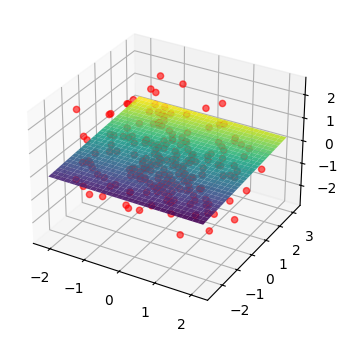

In [19]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Datos simulados
n_samples, n_features = 200, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Entrenar regresión sobre datos reducidos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_2d)

reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(X_scaled, y)

# Crear malla para superficie y predecirla
x_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 30)
y_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 30)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
Z_pred = reg.predict(grid_points).reshape(X_grid.shape)

# Graficar la superficie y los valores dispersos
fig = plt.figure(figsize=(3.4, 5))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_grid, Y_grid, Z_pred, cmap='viridis', edgecolor='none', alpha=0.9)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, color='red', label='Datos reales', alpha=0.6)

ax.set_xlabel('PCA 1 escalado')
ax.set_ylabel('PCA 2 escalado')
ax.set_zlabel('y_pred')
ax.set_title('Superficie de regresión\n con PCA reducido')
plt.legend()
plt.tight_layout()
plt.show()
